In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

,Recovery,So,Sw,S*,Kro,Krw,fw
0,0.00,0.800,0.200,-1.009294e-16,1.000000,-1.028141e-48,-5.140704e-47
1,0.01,0.792,0.208,1.454545e-02,0.956995,3.077385e-06,1.607579e-04
2,0.02,0.784,0.216,2.909091e-02,0.915241,2.461908e-05,1.343144e-03
3,0.03,0.776,0.224,4.363636e-02,0.874720,8.308941e-05,4.727034e-03
4,0.04,0.768,0.232,5.818182e-02,0.835413,1.969527e-04,1.165041e-02
...,...,...,...,...,...,...,...
70,0.70,0.240,0.760,1.018182e+00,-0.000006,1.055543e+00,1.000000e+00
71,0.71,0.232,0.768,1.032727e+00,-0.000035,1.101430e+00,1.000001e+00
72,0.72,0.224,0.776,1.047273e+00,-0.000106,1.148628e+00,1.000002e+00
73,0.73,0.216,0.784,1.061818e+00,-0.000236,1.197155e+00,1.000004e+00


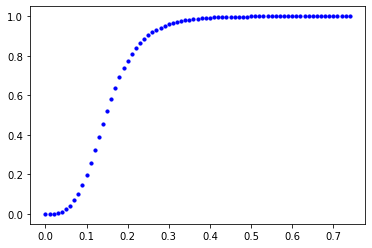

In [2]:
#case 2
Soi=0.80
Swi=0.20
Sor=0.25
meu_O=[20]
meu_W=0.4

rec=np.arange(0.00,0.75,0.01)
So_arr=[]
Sw_arr=[]
s_norm_arr=[]
Krw_arr=[]
Kro_arr=[]
fw_arr=[]
for i in meu_O:
    for r in rec:
        So=Soi-r*Soi
        Sw=1-So
        s_norm=((Sw-Swi)/(1-Swi-Sor))
        Krw=(s_norm)**3
        Kro=(1-s_norm)**3
        fw=1/(1+((Kro*meu_W)/(Krw*i)))
        fw_arr.append(fw)
        So_arr.append(So)
        Sw_arr.append(Sw)
        s_norm_arr.append(s_norm)
        Krw_arr.append(Krw)
        Kro_arr.append(Kro)
len(fw_arr)
df1=DataFrame([rec,So_arr,Sw_arr,s_norm_arr,Kro_arr,Krw_arr,fw_arr],index=['Recovery','So','Sw','S*','Kro','Krw','fw']).T
plt.scatter('Recovery' ,'fw', data=df1 , s=10 ,c='b')
df1

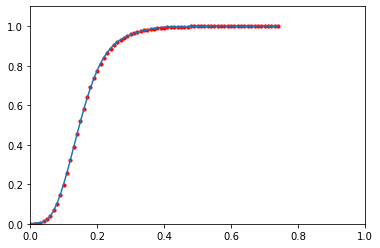

In [3]:
X=df1['Recovery']
Y=df1['fw']

XC=np.linspace(0,0.75)
f=np.poly1d(np.polyfit(X,Y,12))
plt.scatter(X,Y,c='r',s=10)
plt.plot(X,f(X))
plt.xlim(0,1)
plt.ylim(0,1.1)
plt.show()

In [4]:
spc=400 #(mtr)
feild_area=20 #(km2)
wells_req=int((feild_area*0.90)/(spc/1000)**2)
wells_req

112

In [5]:
well_per_month=2
j=0
well_per_month_arr=[]
months_arr=[]
eff_well_arr=[]
cum_wells_drilled_arr=[]
time=2 #(months)
Eff_wells_on_prod_for_1year_arr=[]
for l in range(0,time):
    Eff_wells_on_prod_for_1year_arr.append(0)
    eff_well_arr.append(0)
g=0
for i in range(1,13):
    months=j+i
    cum_wells_drilled=2*i
    cum_wells_drilled_arr.append(cum_wells_drilled)
    months_arr.append(months)
    well_per_month_arr.append(well_per_month)
for i in range(1,(13-time)):
    eff_well=2*i
    Eff_wells_on_prod_for_1year=well_per_month*(len(months_arr)-time-g)/12
    g+=1
    Eff_wells_on_prod_for_1year_arr.append(Eff_wells_on_prod_for_1year)
    eff_well_arr.append(eff_well)
    
df1=DataFrame([months_arr,well_per_month_arr,cum_wells_drilled_arr,eff_well_arr,Eff_wells_on_prod_for_1year_arr],index=['Month','Wells Per Month','Cum Wells Drilled','Eff. Wells on Prod','Eff wells on prod for 1year']).T
df1.index.name='Sr. No.'
df1

,Month,Wells Per Month,Cum Wells Drilled,Eff. Wells on Prod,Eff wells on prod for 1year
Sr. No.,,,,,
0,1.0,2.0,2.0,0.0,0.000000
1,2.0,2.0,4.0,0.0,0.000000
2,3.0,2.0,6.0,2.0,1.666667
3,4.0,2.0,8.0,4.0,1.500000
4,5.0,2.0,10.0,6.0,1.333333
5,6.0,2.0,12.0,8.0,1.166667
6,7.0,2.0,14.0,10.0,1.000000
7,8.0,2.0,16.0,12.0,0.833333
8,9.0,2.0,18.0,14.0,0.666667


In [6]:
total_Eff_wells_on_prod_for_1year=int(sum(Eff_wells_on_prod_for_1year_arr))
total_Eff_wells_on_prod_for_1year

9

In [7]:
#given_data
test_rate_of_ver_well=75 #(m3/d)

OIIP=25 #(MMm3)


#+====================================
year_arr=[]
max_well_in_year_arr=[]
total_wells_drilled_arr=[]
wells_on_prod_arr=[]
wells_on_prod=total_Eff_wells_on_prod_for_1year
wells_on_prod_arr.append(wells_on_prod)
j=0
max_well_in_year=24
max_well_in_year_arr.append(24)
for i in range(0,20):
    if max_well_in_year<120:
        max_well_in_year+=24
        max_well_in_year_arr.append(24)
    else:
        max_well_in_year_arr.append(0)
total_wells_drilled=24
for i in range(0,20):
    if total_wells_drilled<=96:
        total_wells_drilled+=24
        total_wells_drilled_arr.append(24)
    elif total_wells_drilled>96 and total_wells_drilled==120:
        total_wells_drilled+=24
        total_wells_drilled_arr.append(16)
    else:
        total_wells_drilled_arr.append(0)
#==========wells_on_prod====================
for i in range(0,20):
    year_arr.append(j+1)
    if wells_on_prod<105:
        wells_on_prod=wells_on_prod_arr[j]+(24-9)+9
        wells_on_prod_arr.append(wells_on_prod)
    elif wells_on_prod>=105:
        wells_on_prod_arr.append(112)
    j+=1

## Production Profile Calculation

In [8]:
wc_app_arr=[]
liq_rate_arr=[]
oil_rate_arr=[]
approx_cum_oil_arr=[]
Np_by_N_arr=[]
end_of_year_wcut_arr=[]
avg_water_arr=[]
avg_oil_rate_arr=[]
cum_oil_arr=[]
oil_rec_arr=[]
approx_cum_oil=0
wc_app=0
wc_app_arr.append(0)
cum_oil=0
for i in range(0,20):
    liq_rate=wells_on_prod_arr[i]*test_rate_of_ver_well
    oil_rate=liq_rate*(1-wc_app_arr[i])
    approx_cum_oil=approx_cum_oil+(oil_rate*365/1000000)
    k=approx_cum_oil/OIIP
    y=abs(f(k))
    #y= abs(round(f[0]*k**p + f[1]*k**(p-1) +  f[2]*k**(p-2) + f[3]*k**(p-3) + f[4]*k**(p-4) + f[5]*k**(p-5) + f[6]*k**(p-6)+f[7]*k**(p-7)+f[8]*k**(p-8)+f[9]*k**(p-9)+f[10]*k**(p-10)+f[11]*k**(p-11)+f[12]*k**(p-12),4))
    end_of_year_wcut_arr.append(y)
    wc_app_arr.append(y)
    avg_water=(wc_app_arr[i]+end_of_year_wcut_arr[i])/2
    avg_oil_rate=liq_rate*(1-avg_water)
    cum_oil+=(avg_oil_rate*365/1000000)
    oil_rec=(cum_oil*100*0.95/OIIP)
    oil_rec_arr.append(oil_rec)
    cum_oil_arr.append(cum_oil)
    avg_oil_rate_arr.append(avg_oil_rate)
    avg_water_arr.append(avg_water)
    Np_by_N_arr.append(k)
    liq_rate_arr.append(liq_rate)
    oil_rate_arr.append(oil_rate)
    approx_cum_oil_arr.append(approx_cum_oil)
    

In [9]:
df3=DataFrame([year_arr,max_well_in_year_arr,total_wells_drilled_arr,wells_on_prod_arr,liq_rate_arr,wc_app_arr,oil_rate_arr,approx_cum_oil_arr,Np_by_N_arr,end_of_year_wcut_arr,avg_water_arr,avg_oil_rate_arr,cum_oil_arr,oil_rec_arr],index=[['year_arr','max_well_in_year_arr','total_wells_drilled_arr','wells_on_prod_arr','liq_rate_arr','wc_app_arr','oil_rate_arr','approx_cum_oil_arr','Np_by_N_arr','end_of_year_wcut_arr','avg_water_arr','avg_oil_rate_arr','cum_oil_arr','oil_rec_arr']]).T.head(19)

In [10]:
oil_rec_perc_arr=[]
for i in range(0,20):
    oil_rec_perc=round(oil_rec_arr[i]/100,4)
    oil_rec_perc_arr.append(oil_rec_perc)
df3['oil_rec_perc_arr']=oil_rec_perc_arr[0:19]

In [11]:
df3

,year_arr,max_well_in_year_arr,total_wells_drilled_arr,wells_on_prod_arr,liq_rate_arr,wc_app_arr,oil_rate_arr,approx_cum_oil_arr,Np_by_N_arr,end_of_year_wcut_arr,avg_water_arr,avg_oil_rate_arr,cum_oil_arr,oil_rec_arr,oil_rec_perc_arr
0,1.0,24.0,24.0,9.0,675.0,0.000000,675.000000,0.246375,0.009855,0.002460,0.001230,674.169673,0.246072,0.935073,0.0094
1,2.0,24.0,24.0,33.0,2475.0,0.002460,2468.910932,1.147527,0.045901,0.015309,0.008885,2453.010774,1.141421,4.337399,0.0434
2,3.0,24.0,24.0,57.0,4275.0,0.015309,4209.554700,2.684015,0.107361,0.244367,0.129838,3719.942174,2.499200,9.496959,0.0950
3,4.0,24.0,24.0,81.0,6075.0,0.244367,4590.468448,4.359536,0.174381,0.659270,0.451819,3330.201236,3.714723,14.115948,0.1412
4,5.0,24.0,16.0,105.0,7875.0,0.659270,2683.247809,5.338921,0.213557,0.822688,0.740979,2039.788943,4.459246,16.945135,0.1695
5,6.0,0.0,0.0,112.0,8400.0,0.822688,1489.418748,5.882559,0.235302,0.878769,0.850728,1253.880932,4.916913,18.684268,0.1868
6,7.0,0.0,0.0,112.0,8400.0,0.878769,1018.343115,6.254254,0.250170,0.905844,0.892306,904.627910,5.247102,19.938987,0.1994
7,8.0,0.0,0.0,112.0,8400.0,0.905844,790.912705,6.542938,0.261718,0.922022,0.913933,722.965486,5.510984,20.941740,0.2094
8,9.0,0.0,0.0,112.0,8400.0,0.922022,655.018267,6.782019,0.271281,0.932919,0.927470,609.248967,5.733360,21.786769,0.2179
9,10.0,0.0,0.0,112.0,8400.0,0.932919,563.479668,6.987689,0.279508,0.940861,0.936890,530.125255,5.926856,22.522052,0.2252


In [12]:
new_oil_prod_in_year_arr=[]
new_oil_prod_in_year_arr=[9,24,17]
for i in range(0,17):
    new_oil_prod_in_year_arr.append(0)
    

In [13]:
total_oil_producers_arr=wells_on_prod_arr
r_by_p_arr=[]
for i in range(0,20):
    d=(OIIP-cum_oil_arr[i])/(avg_oil_rate_arr[i]*365/1000000)
    r_by_p_arr.append(d)
#len(cum_oil_arr),avg_oil_rate_arr


In [14]:
df4=DataFrame([year_arr,new_oil_prod_in_year_arr,total_oil_producers_arr,avg_oil_rate_arr,avg_water_arr,cum_oil_arr,oil_rec_arr,r_by_p_arr],index=['Year','new_oil_prod_in_year','total_oil_producers','avg_oil_rate','avg_water','cum_oil','oil_rec','R/P']).T.head(19)

## Production Prodile

In [15]:
df3

,year_arr,max_well_in_year_arr,total_wells_drilled_arr,wells_on_prod_arr,liq_rate_arr,wc_app_arr,oil_rate_arr,approx_cum_oil_arr,Np_by_N_arr,end_of_year_wcut_arr,avg_water_arr,avg_oil_rate_arr,cum_oil_arr,oil_rec_arr,oil_rec_perc_arr
0,1.0,24.0,24.0,9.0,675.0,0.000000,675.000000,0.246375,0.009855,0.002460,0.001230,674.169673,0.246072,0.935073,0.0094
1,2.0,24.0,24.0,33.0,2475.0,0.002460,2468.910932,1.147527,0.045901,0.015309,0.008885,2453.010774,1.141421,4.337399,0.0434
2,3.0,24.0,24.0,57.0,4275.0,0.015309,4209.554700,2.684015,0.107361,0.244367,0.129838,3719.942174,2.499200,9.496959,0.0950
3,4.0,24.0,24.0,81.0,6075.0,0.244367,4590.468448,4.359536,0.174381,0.659270,0.451819,3330.201236,3.714723,14.115948,0.1412
4,5.0,24.0,16.0,105.0,7875.0,0.659270,2683.247809,5.338921,0.213557,0.822688,0.740979,2039.788943,4.459246,16.945135,0.1695
5,6.0,0.0,0.0,112.0,8400.0,0.822688,1489.418748,5.882559,0.235302,0.878769,0.850728,1253.880932,4.916913,18.684268,0.1868
6,7.0,0.0,0.0,112.0,8400.0,0.878769,1018.343115,6.254254,0.250170,0.905844,0.892306,904.627910,5.247102,19.938987,0.1994
7,8.0,0.0,0.0,112.0,8400.0,0.905844,790.912705,6.542938,0.261718,0.922022,0.913933,722.965486,5.510984,20.941740,0.2094
8,9.0,0.0,0.0,112.0,8400.0,0.922022,655.018267,6.782019,0.271281,0.932919,0.927470,609.248967,5.733360,21.786769,0.2179
9,10.0,0.0,0.0,112.0,8400.0,0.932919,563.479668,6.987689,0.279508,0.940861,0.936890,530.125255,5.926856,22.522052,0.2252


## Master Table

In [16]:
df4

,Year,new_oil_prod_in_year,total_oil_producers,avg_oil_rate,avg_water,cum_oil,oil_rec,R/P
0,1.0,9.0,9.0,674.169673,0.001230,0.246072,0.935073,100.596309
1,2.0,24.0,33.0,2453.010774,0.008885,1.141421,4.337399,26.647241
2,3.0,17.0,57.0,3719.942174,0.129838,2.499200,9.496959,16.571771
3,4.0,0.0,81.0,3330.201236,0.451819,3.714723,14.115948,17.511202
4,5.0,0.0,105.0,2039.788943,0.740979,4.459246,16.945135,27.589147
5,6.0,0.0,112.0,1253.880932,0.850728,4.916913,18.684268,43.881485
6,7.0,0.0,112.0,904.627910,0.892306,5.247102,19.938987,59.822971
7,8.0,0.0,112.0,722.965486,0.913933,5.510984,20.941740,73.854928
8,9.0,0.0,112.0,609.248967,0.927470,5.733360,21.786769,86.639974
9,10.0,0.0,112.0,530.125255,0.936890,5.926856,22.522052,98.571402


Text(0, 0.5, 'Oil Recovery, %')

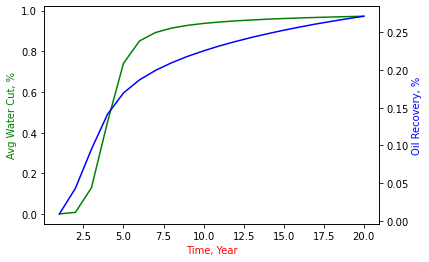

In [17]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(year_arr,avg_water_arr, 'g-')
ax2.plot(year_arr,oil_rec_perc_arr, 'b-')

ax1.set_xlabel('Time, Year',color='r')
ax1.set_ylabel('Avg Water Cut, %', color='g')
ax2.set_ylabel('Oil Recovery, %', color='b')

# EOR

#case 2

Soi=0.80

Swi=0.20

Sor=0.25

meu_O=[20]

meu_W=0.4


Here mobility ratio is 50 that is not favorable

so first increase the water viscosity by polymer flooding and then

go for Sor (IFT reduction) by either Miscleble or ASP Process

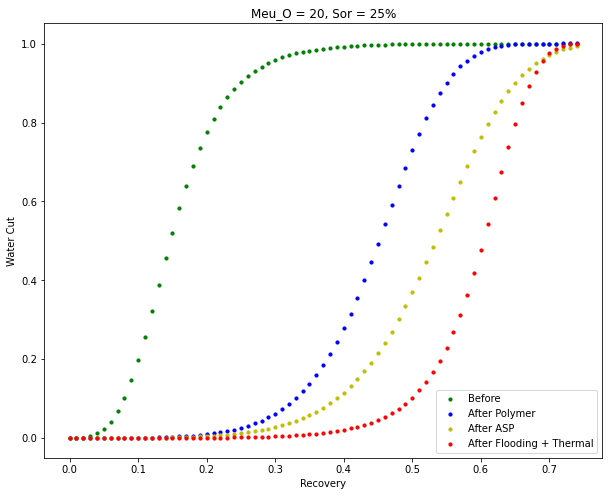

In [18]:
#case 2
Soi=0.80
Swi=0.20
Sor=0.25
meu_O=[20]
meu_W=0.4

rec=np.arange(0.00,0.75,0.01)
So_arr=[]
Sw_arr=[]
s_norm_arr=[]
Krw_arr=[]
Kro_arr=[]
fw_arr=[]
for i in meu_O:
    for r in rec:
        So=Soi-r*Soi
        Sw=1-So
        s_norm=((Sw-Swi)/(1-Swi-Sor))
        Krw=(s_norm)**3
        Kro=(1-s_norm)**3
        fw=1/(1+((Kro*meu_W)/(Krw*i)))
        fw_arr.append(fw)
        So_arr.append(So)
        Sw_arr.append(Sw)
        s_norm_arr.append(s_norm)
        Krw_arr.append(Krw)
        Kro_arr.append(Kro)
df1=DataFrame([rec,So_arr,Sw_arr,s_norm_arr,Kro_arr,Krw_arr,fw_arr],index=['Recovery','So','Sw','S*','Kro','Krw','fw']).T

#Assume we do one of above mentioned processes to reduce IFT and Sor reduces to 0.10
So_arr=[]
Sw_arr=[]
s_norm_arr=[]
Krw_arr=[]
Kro_arr=[]
fw_arr=[]
def case_fir(Soi,Swi,Sor,meu_W):
    for i in meu_O:
        for r in rec:
            So=Soi-r*Soi
            Sw=1-So
            s_norm=((Sw-Swi)/(1-Swi-Sor))
            Krw=(s_norm)**3
            Kro=(1-s_norm)**3
            fw=1/(1+((Kro*meu_W)/(Krw*i)))
            fw_arr.append(fw)
            So_arr.append(So)
            Sw_arr.append(Sw)
            s_norm_arr.append(s_norm)
            Krw_arr.append(Krw)
            Kro_arr.append(Kro)
#==================Flooding+ASP===================================================
case_fir(0.80,0.20,0.25,140)
df5=DataFrame([rec,So_arr,Sw_arr,s_norm_arr,Kro_arr,Krw_arr,fw_arr],index=['Recovery','So','Sw','S*','Kro','Krw','fw']).T
So_arr=[]
Sw_arr=[]
s_norm_arr=[]
Krw_arr=[]
Kro_arr=[]
fw_arr=[]
case_fir(0.80,0.20,0.15,140)
df6=DataFrame([rec,So_arr,Sw_arr,s_norm_arr,Kro_arr,Krw_arr,fw_arr],index=['Recovery','So','Sw','S*','Kro','Krw','fw']).T
#===================================================================================
#==================================flooding from the begining+Thermal==========================================
So_arr=[]
Sw_arr=[]
s_norm_arr=[]
Krw_arr=[]
Kro_arr=[]
fw_arr=[]
#thermal will reduce the oil viscosity
meu_O=[2]
case_fir(0.80,0.20,0.20,140)
df7=DataFrame([rec,So_arr,Sw_arr,s_norm_arr,Kro_arr,Krw_arr,fw_arr],index=['Recovery','So','Sw','S*','Kro','Krw','fw']).T
plt.scatter('Recovery' ,'fw', data=df1 , s=10 ,c='g')
plt.scatter('Recovery' ,'fw', data=df5 , s=10 ,c='b')
plt.scatter('Recovery' ,'fw', data=df6 , s=10 ,c='y')
f=plt.scatter('Recovery' ,'fw', data=df7 , s=10 ,c='r')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 8)
plt.title('Meu_O = 20, Sor = 25%')
plt.xlabel('Recovery')
plt.ylabel('Water Cut')
plt.legend(["Before", "After Polymer","After ASP","After Flooding + Thermal"], loc ="lower right")


In [19]:
OPEX = 20 #(US$/bbl)
oil_price = 60 #(US$/bbl)
royalty = 6 #(US$/bbl) 
income_tax = 5 #(%)
disc_rate = 14 #(%)
CAPEX = 30 #(Million US$)
year_arr=[]
disc_factor_arr=[]
opex_arr=[]
opex_arr.append(0)
capex_arr=[]
capex_arr.append(CAPEX*1000000)
for i in range(0,19):
    capex_arr.append(0)
disc_outflow_arr=[]
oil_rate_perday_arr=[]
oil_rate_perday_arr.append(0)
oil_rate_peryear_arr=[]
oil_rate_peryear_arr.append(0)
revenue_by_pv_arr=[]
disc_revenue_arr=[]
npv_before_tax_arr=[]
npv_after_tax_arr=[]
cons_arr=[]
#cons_arr.append(-30000000)
#year_arr.append(0)
for i in range(0,16):
    oil_rate_perday_arr.append(round(avg_oil_rate_arr[i],2)*6.28981)
    oil_rate_peryear_arr.append(round(avg_oil_rate_arr[i],2)*6.28981*365)
    revenue_by_pv_arr.append(oil_rate_peryear_arr[i]*oil_price)
    year_arr.append(i)
    d=round((1+(disc_rate/100))**year_arr[i],2)
    disc_factor_arr.append(d)
    disc_revenue_arr.append(revenue_by_pv_arr[i]/disc_factor_arr[i])
    o=round(avg_oil_rate_arr[i]*365*6.28981*OPEX,2)
    #print(o)
    #print(d)
    disc_out=round((opex_arr[i]+capex_arr[i])/disc_factor_arr[i],2)
    disc_outflow_arr.append(disc_out)
    npv_before_tax_arr.append(disc_revenue_arr[i]-disc_outflow_arr[i])
    npv_after_tax_arr.append((disc_revenue_arr[i]-disc_outflow_arr[i])*(1-(income_tax/100)))
    opex_arr.append(o)
#sum(revenue_by_pv_arr),sum(npv_before_tax_arr),sum(npv_after_tax_arr),opex_arr
#for i in range(1,20):
#    cons_arr.append(revenue_by_pv_arr[i])
#revenue_by_pv_arr,cons_arr
irr_before_tax=npf.irr(npv_before_tax_arr)
irr_after_tax=npf.irr(npv_after_tax_arr)
irr_before_tax,irr_after_tax
df8=DataFrame([year_arr,disc_factor_arr,opex_arr,capex_arr,disc_outflow_arr,oil_rate_peryear_arr,revenue_by_pv_arr,disc_revenue_arr,npv_before_tax_arr,npv_after_tax_arr],index=['Year','Discounted Factor','OPEX','CAPEX','Discounted Outflow','Oil Rate Per Year, bbl','Revenue/PV','Discounted Revenue','NPV Before Tax, $','NPV After Tax, $']).T.head(15)
df8['Royality']=df8['Oil Rate Per Year, bbl']*royalty
df8['NPV After Royality']=(df8['NPV After Tax, $']-df8['Royality'])
sum_after_royality=sum(df8['NPV After Royality'])
npv_after_royality=list(df8['NPV After Royality'])
irr_after_royality=npf.irr(df8['NPV After Royality'])
pay_out_time=round(abs(df8['NPV Before Tax, $'][0]/df8['NPV Before Tax, $'][1]*12),2)
df9=DataFrame([[("%.2f" % (sum(revenue_by_pv_arr))),("%.2f" % (sum(npv_before_tax_arr))),("%.2f" % (sum(npv_after_tax_arr))),irr_before_tax*100,irr_after_tax*100,("%.2f" % sum_after_royality),irr_after_royality*100,pay_out_time]],columns=['Present Revenue, $','NPV Before Tax, $','NPV After Tax, $','IRR Before Tax, %', 'IRR After Tax, %','NPV after Tax and Royality, $','IRR after Royality, %','Pay Out Time, Months'])
df8

,Year,Discounted Factor,OPEX,CAPEX,Discounted Outflow,"Oil Rate Per Year, bbl",Revenue/PV,Discounted Revenue,"NPV Before Tax, $","NPV After Tax, $",Royality,NPV After Royality
0,0.0,1.00,0.000000e+00,30000000.0,3.000000e+07,0.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+07,-2.850000e+07,0.000000e+00,-2.850000e+07
1,1.0,1.14,3.095491e+07,0.0,2.715343e+07,1.547746e+06,9.286479e+07,8.146034e+07,5.430691e+07,5.159156e+07,9.286479e+06,4.230508e+07
2,2.0,1.30,1.126315e+08,0.0,8.663961e+07,5.631573e+06,3.378944e+08,2.599187e+08,1.732791e+08,1.646152e+08,3.378944e+07,1.308257e+08
3,3.0,1.48,1.708034e+08,0.0,1.154077e+08,8.540166e+06,5.124100e+08,3.462230e+08,2.308152e+08,2.192745e+08,5.124100e+07,1.680335e+08
4,4.0,1.69,1.529082e+08,0.0,9.047824e+07,7.645409e+06,4.587245e+08,2.714346e+08,1.809564e+08,1.719086e+08,4.587245e+07,1.260361e+08
5,5.0,1.93,9.365816e+07,0.0,4.852754e+07,4.682910e+06,2.809746e+08,1.455827e+08,9.705516e+07,9.220241e+07,2.809746e+07,6.410494e+07
6,6.0,2.19,5.757271e+07,0.0,2.628891e+07,2.878633e+06,1.727180e+08,7.886667e+07,5.257776e+07,4.994887e+07,1.727180e+07,3.267707e+07
7,7.0,2.50,4.153655e+07,0.0,1.661462e+07,2.076832e+06,1.246099e+08,4.984397e+07,3.322935e+07,3.156788e+07,1.246099e+07,1.910689e+07
8,8.0,2.85,3.319540e+07,0.0,1.164751e+07,1.659781e+06,9.958683e+07,3.494275e+07,2.329524e+07,2.213048e+07,9.958683e+06,1.217179e+07
9,9.0,3.25,2.797404e+07,0.0,8.607397e+06,1.398704e+06,8.392226e+07,2.582223e+07,1.721484e+07,1.635410e+07,8.392226e+06,7.961869e+06


In [20]:
df9

,"Present Revenue, $","NPV Before Tax, $","NPV After Tax, $","IRR Before Tax, %","IRR After Tax, %","NPV after Tax and Royality, $","IRR after Royality, %","Pay Out Time, Months"
0,2507586158.68,880077686.34,836073802.02,290.870705,290.870705,585826013.23,244.25697,6.63


In [21]:
#directly calculated from excel
OIL_PRICE=[1029026634,1167160543,1305294452,752758816.6,614624907.8,476490998.9]
OPEX=[844848089.1,798803452.8,752758816.6,936937361.6,982981997.9,1029026634]
CAPEX=[887892725.4,884892725.4,881892725.4,893892725.4,896892725.4,899892725.4]
PERCENT=[10,20,30,-10,-20,-30]
df=DataFrame([PERCENT,OIL_PRICE,OPEX,CAPEX],index=['PERCENT','OIL_PRICE','OPEX','CAPEX']).T
df

,PERCENT,OIL_PRICE,OPEX,CAPEX
0,10.0,1.029027e+09,8.448481e+08,887892725.4
1,20.0,1.167161e+09,7.988035e+08,884892725.4
2,30.0,1.305294e+09,7.527588e+08,881892725.4
3,-10.0,7.527588e+08,9.369374e+08,893892725.4
4,-20.0,6.146249e+08,9.829820e+08,896892725.4
5,-30.0,4.764910e+08,1.029027e+09,899892725.4


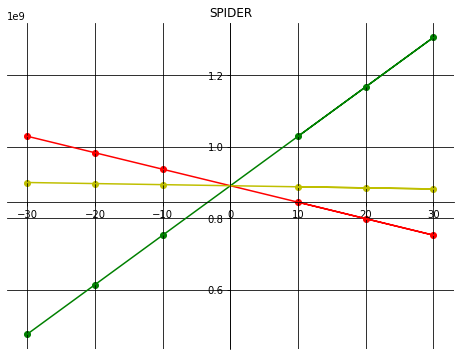

In [22]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('SPIDER')

# move axes
ax.spines['left'].set_position(('axes', 0.50))
# ax.spines['left'].set_smart_bounds(True)
ax.yaxis.set_ticks_position('left')

ax.spines['bottom'].set_position(('axes', 0.450))
# ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.grid(True,c='black')

ax.scatter(df.PERCENT,df.OIL_PRICE,c='g')
ax.plot(df.PERCENT,df.OIL_PRICE,c='g')
ax.scatter(df.PERCENT,df.OPEX,c='r')
ax.plot(df.PERCENT,df.OPEX,c='r')
ax.scatter(df.PERCENT,df.CAPEX,c='y')
ax.plot(df.PERCENT,df.CAPEX,c='y')
ax.legend(['OIL PRICE','OPEX','CAPEX'])
ax.set_xlabel('Variation, % ---->',c='blue',position=(1.1,30))
ax.set_ylabel('NPV, Billion ---->',c='blue',position=(-30,0))